# Análise das Corridas

O notebook apresenta uma análise uni e bivariada das variáveis para as corridas.

Ao final, animações foram realizadas de modo que a visualização das corridas fique mais fácil, apresentando tanto variações geográficas em termos de latitude e longitude, quanto variações de velocidade e elevação em função da distância da atividade.

- Importar bibliotecas necessárias:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import time
from IPython import display
from xml.dom import minidom
import math
import warnings as wn

wn.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_style('whitegrid')

- Colocar três casas decimais e separador de milhar:

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

- Importar o dataset `activities_PBI.csv` criado anteriormente, e mostrar as cinco primeiras linhas:

In [3]:
df = pd.read_csv('activities_PBI.csv')

In [4]:
corrida = df[df['Tipo de atividade']=='Corrida']

In [5]:
corrida.head()

,Data da atividade,Tipo de atividade,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Pedalada Acum. (km),Distância Corrida Acum. (km)
61,2019-02-09,Corrida,1104,3.550,2134175090.gpx,1093,"3,558.700",3.900,35.580,913.100,949.000,11.100,0.008,12,3.256,11,572.730,3.550
104,2019-09-06,Corrida,738,2.430,2847988121.gpx.gz,738,"2,430.100",4.300,46.700,918.500,945.300,20.200,0.140,20,3.293,0,827.530,5.980
105,2019-09-07,Corrida,1187,3.750,2851051986.gpx.gz,1187,"3,750.700",4.300,45.500,912.800,950.000,24.500,0.083,20,3.160,0,827.530,9.730
106,2019-09-13,Corrida,1113,3.520,2879400885.gpx.gz,1110,"3,522.100",4.800,28.000,913.300,995.600,5.600,-1.775,21,3.173,3,827.530,13.250
107,2019-09-14,Corrida,1804,4.470,2879401674.gpx.gz,1804,"4,473.400",4.000,3.500,942.600,946.100,5.200,0.049,13,2.480,0,827.530,17.720


- Drop variável `Distância Pedalada Acum. (km)`:

In [6]:
corrida.drop(['Tipo de atividade','Distância Pedalada Acum. (km)'], axis=1, inplace=True)

- Checar tipos das variáveis e trocar as necessárias:

In [16]:
corrida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 61 to 173
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data da atividade             31 non-null     object 
 1   Tempo decorrido (s)           31 non-null     int64  
 2   Distância (km)                31 non-null     float64
 3   Arquivo gpx                   31 non-null     object 
 4   Tempo de movimentação (s)     31 non-null     int64  
 5   Distância (m)                 31 non-null     float64
 6   Velocidade máx. (m/s)         31 non-null     float64
 7   Ganho de elevação (m)         31 non-null     float64
 8   Elevação mínima (m)           31 non-null     float64
 9   Elevação máxima (m)           31 non-null     float64
 10  Inclinação máxima (graus)     31 non-null     float64
 11  Inclinação média (graus)      31 non-null     float64
 12  Hora da atividade             31 non-null     int64  
 13  Veloc

In [17]:
# Data da atividade
corrida['Data da atividade'] = pd.to_datetime(corrida['Data da atividade'])

# Arquivo gpx
corrida['Arquivo gpx'] = corrida['Arquivo gpx'].astype(str)

- A seguir, uma breve descrição estatística das variáveis quantitativas:

In [18]:
corrida.describe()

,Tempo decorrido (s),Distância (km),Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Corrida Acum. (km)
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,"1,067.323",3.505,"1,065.774","3,509.019",4.458,39.680,913.371,951.255,19.684,-0.338,20.323,3.315,1.548,56.055
std,153.577,0.269,153.770,268.843,0.353,12.265,13.229,18.708,9.692,0.469,2.120,0.187,2.567,31.950
min,738.000,2.430,738.000,"2,430.100",3.900,3.500,886.200,920.200,5.200,-1.775,12.000,2.480,0.000,3.550
25%,"1,029.000",3.490,"1,026.500","3,495.250",4.300,33.850,905.050,940.400,11.800,-0.611,21.000,3.278,0.000,29.945
50%,"1,044.000",3.500,"1,042.000","3,504.100",4.400,40.900,912.100,948.000,20.300,-0.343,21.000,3.350,0.000,56.150
75%,"1,066.500",3.510,"1,066.500","3,515.600",4.700,45.700,918.850,961.250,24.950,-0.060,21.000,3.398,3.000,82.360
max,"1,804.000",4.470,"1,804.000","4,473.400",5.500,83.600,944.100,996.700,47.400,0.829,21.000,3.498,11.000,108.670


As estatísticas de algumas variáveis sugere atividades muito semelhantes, com $ Valor_{min} \approx Q1 \approx Q3 \approx Valor_{max}$.

Portanto, o próximo passo é aplicar **análises univariadas** das variáveis através de gráficos de distribuição de frequências e boxplots, visando gerar insights acerca das atividades, como presença de outliers, assimetria, etc.

## Análise univariada

1 - Dist. de frequências e boxplot para a variável `Tempo decorrido (s)`:

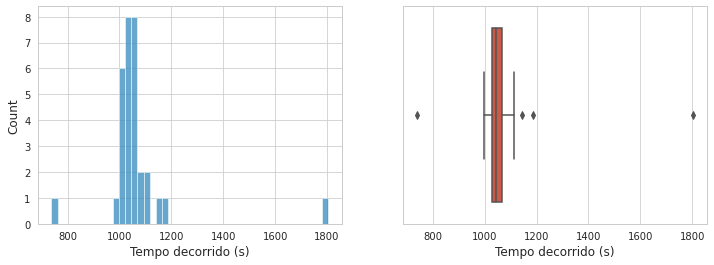

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Tempo decorrido (s)'],ax=ax[0])
sns.boxplot(x='Tempo decorrido (s)', data=corrida);

Nota-se, pelo gráfico de dist. de frequências, uma distribuição moderadamente simétrica. Ademais, nota-se a presença de outliers inferiores e superiores, com quartis inferior (1029 s) e superior (1066 s) muito póximos, ou seja, não existe um grande variabilidade entre os dados, pois 50% dos mesmos se concentram entre Q1 e Q3.

A presença de outliers deve ser sempre averiguada, pois tais valores podem influenciar fortemente alguns algoritmos de aprendizado de máquina, como por exemplo regressão linear.

2 - Dist. de frequências e boxplot para a variável `Distância (km)`:

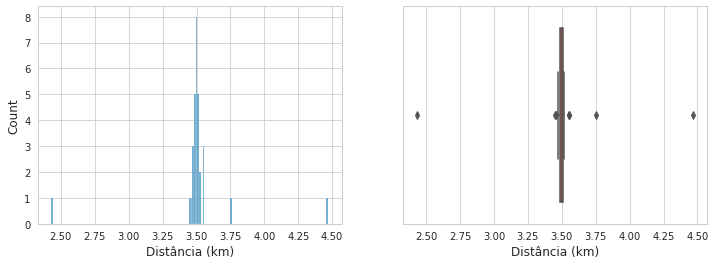

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Distância (km)'],ax=ax[0])
sns.boxplot(x='Distância (km)', data=corrida);

Nota-se, principalmente pelo boxplot, valores de Q1 e Q3 muito próximos, ou seja, variabilidade de dados muito baixa, com a presença de alguns outliers. Isso nos diz que a grande maioria das atividades se concetra em cerca de 3.5 km. 

Claramente, a variável `Distância (m)` apresenta a mesma tednência gráfica e, portanto, não será apresentada.

3 - Dist. de frequências e boxplot para a variável `Tempo de movimentação (s)`:

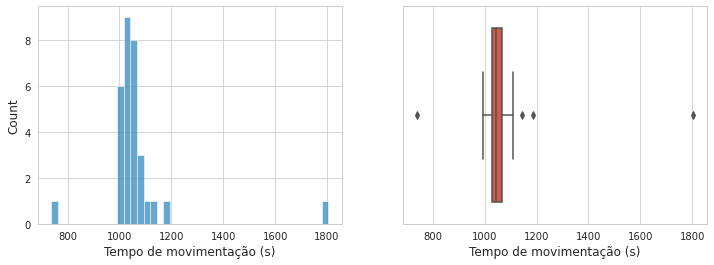

In [21]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Tempo de movimentação (s)'],ax=ax[0])
sns.boxplot(x='Tempo de movimentação (s)', data=corrida);

A variável apresenta características gráficas similares à variável `Tempo decorrido (s)`, com Q1 próximo a Q3, e presença do mesmo número de outliers.

4 - Dist. de frequências e boxplot para a variável `Velocidade máx. (m/s)`:

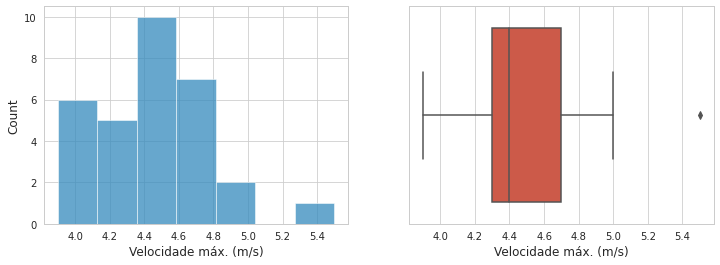

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Velocidade máx. (m/s)'],ax=ax[0])
sns.boxplot(x='Velocidade máx. (m/s)', data=corrida);

A variável apresenta uma distribuição moderadamente assimétrica à direita, com presença de apenas um outlier acima do limite superior. Analisando os gráficos, nota-se que os valores de velocidade são muito próximos, sendo que 50% dos valores se concentra em IQR = Q3 - Q1 = 4.7 - 4.3 = 0.4 m/s.

5 - Dist. de frequências e boxplot para a variável `Velocidade média (m/s)`:

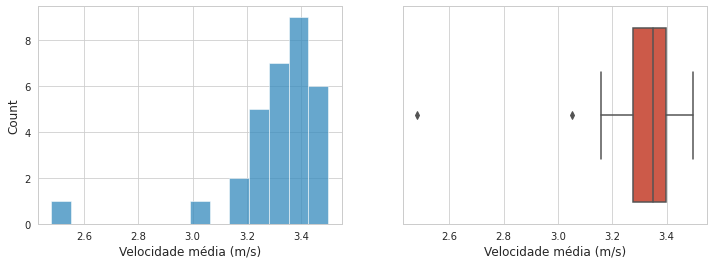

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Velocidade média (m/s)'],ax=ax[0])
sns.boxplot(x='Velocidade média (m/s)', data=corrida);

Variável apresenta uma assimetria à esquerda, com presença de outliers abaixo do limite inferior. Nota-se que, nesse caso, o valor da velocidade para as atividades é ainda mais próxima que no caso da variável velocidade máxima, onde IQR = Q3 - Q1 = 3.39 - 3.29 = 0.1 m/s.

6 -  Dist. de frequências e boxplot para a variável `Ganho de elevação (m)`:

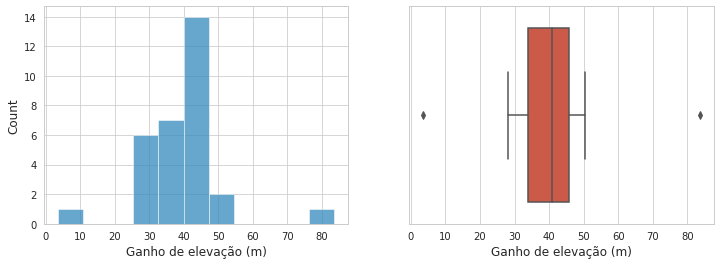

In [24]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Ganho de elevação (m)'],ax=ax[0])
sns.boxplot(x='Ganho de elevação (m)', data=corrida);

7 - Dist. de frequências e boxplot para a variável `Elevação mínima (m)`:

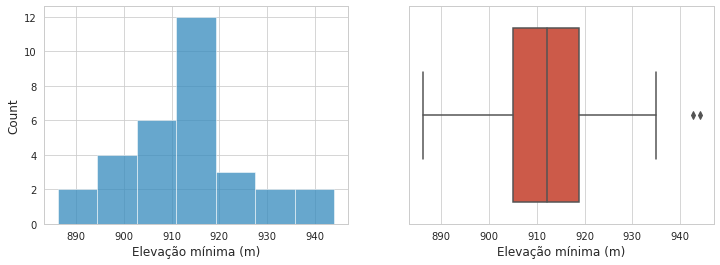

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Elevação mínima (m)'],ax=ax[0])
sns.boxplot(x='Elevação mínima (m)', data=corrida);

8 - Dist. de frequências e boxplot para a variável `Elevação máxima (m)`:

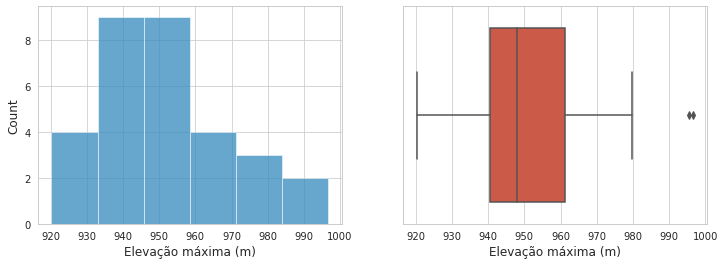

In [26]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Elevação máxima (m)'],ax=ax[0])
sns.boxplot(x='Elevação máxima (m)', data=corrida);

9 - Dist. de frequências e boxplot para a variável `Inclinação máxima (graus)`:

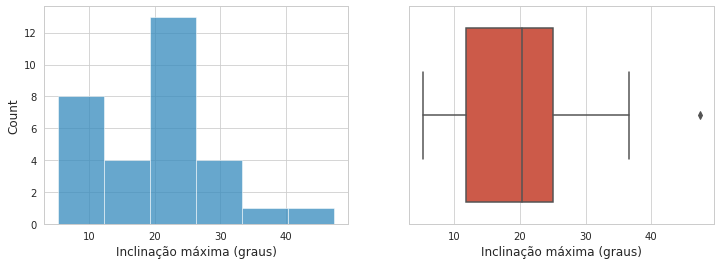

In [41]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Inclinação máxima (graus)'],ax=ax[0])
sns.boxplot(x='Inclinação máxima (graus)', data=corrida);

Variável apresenta uma distribuição moderadamente simétrica, como exposto na dist. de frequências, onde a maioria das atividades teve inclinação máxima igual a 20°, valor também exposto no boxplot pela mediana. Ademais, vemos a presença de apenas um outlier.

10 - Dist. de frequências e boxplot para a variável `Tempo parado (s)`:

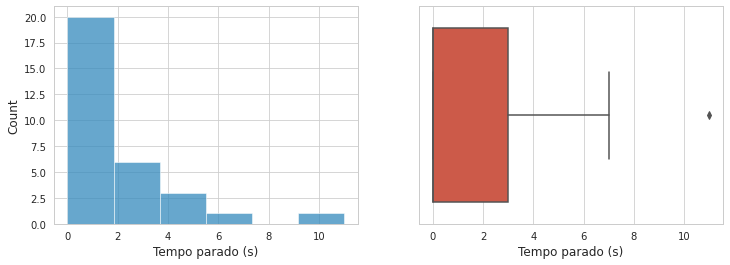

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Tempo parado (s)'],ax=ax[0])
sns.boxplot(x='Tempo parado (s)', data=corrida);

Variável possui distribuição assimétrica com calda para a direita, como visto no gráfico de dist. de frequências, com maioria das atividades com tempo parado igual a zero. Ademais, nota-se pelo boxplot que $tempo_{min} = Q1 = mediana$, com grande variabilidade em Q3, e presença de um outlier.

11 - Dist. de frequências e boxplot para a variável `Hora da atividade`:

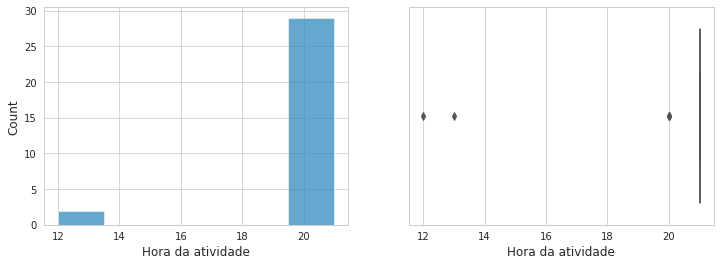

In [29]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(corrida['Hora da atividade'],ax=ax[0])
sns.boxplot(x='Hora da atividade', data=corrida);

Nota-se, tanto pela dist. de frequências e boxplot, que as atividades ocorreram majoritariamente após as 8:00PM, com a presença de alguns outliers.

Nota-se que, de maneira geral, as variávels apresentam valores muito próximos (Q1 próximo a Q3), o que se traduz na grande presença de outliers. A seguir, portanto, serão analisadas interações entre variáveis, para tentar compreender melhor as atividades,principalmente em relação aos eventos extremos.

## Análise Bivariada

A análise bivariada das variáveis visa entender melhor a relação entre as mesmas, e ganhar mais alguns insights em relação às corridas.

- Existe correlação entre tempo parado e distância?

Nota-se que não existe correlação entre tempo parado e distância, ou seja, o tempo parado não tende a aumentar com aumento da distância da corrida.

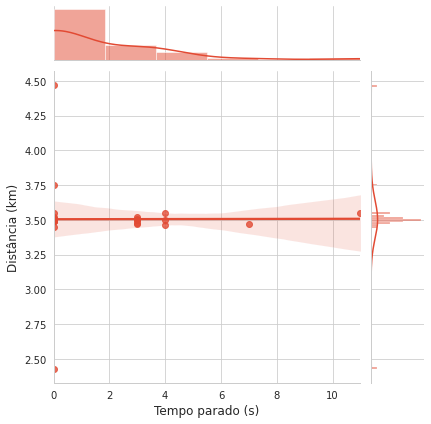

In [51]:
sns.jointplot(x='Tempo parado (s)',y='Distância (km)',data=corrida, kind='reg');

- Existe correlação entre tempo parado e inclinação máxima?

Nota-se que existe uma correção negativa entre inclinação máxima e tempo parado, ou seja, a tendência é que em terrenos mais íngremes, o tempo parado seja menor (ou, como demonstrado no gráfico abaixo e nos gráficos univariados, zero).\
O mesmo pode ser observado nos gráficos segmentados de inclinação máxima positiva e negativa.

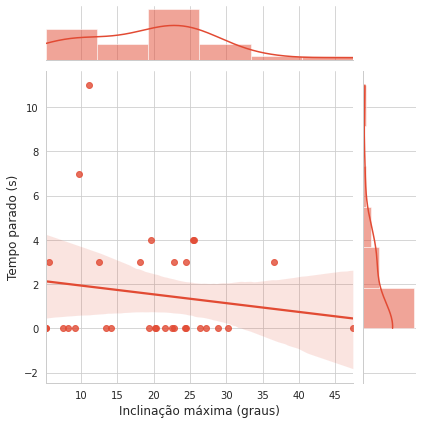

In [50]:
sns.jointplot(x='Inclinação máxima (graus)',y='Tempo parado (s)',data=corrida, kind='reg');

In [46]:
# Checagem de desbalanceamento de atividades
print('Número de pedaladas com inclinação média negativa:',
corrida[corrida['Inclinação média (graus)']<0].shape[0], 
'\nNúmero de pedaladas com inclinação média positiva:',
corrida[corrida['Inclinação média (graus)']>0].shape[0])

Número de pedaladas com inclinação média negativa: 24 
Número de pedaladas com inclinação média positiva: 7


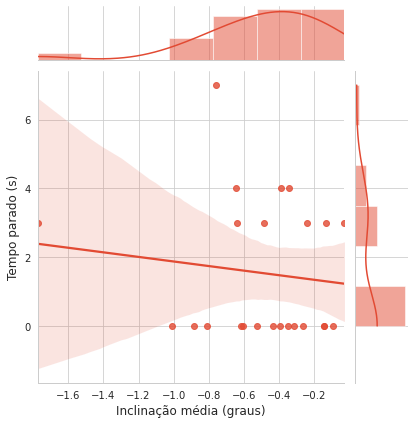

In [47]:
# Inclinação média negativa
sns.jointplot(x='Inclinação média (graus)', y='Tempo parado (s)', 
              data=corrida[corrida['Inclinação média (graus)']<0], kind='reg');

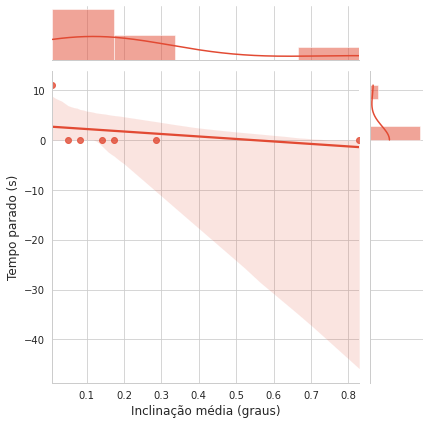

In [49]:
# Inclinação média postiiva
sns.jointplot(x='Inclinação média (graus)', y='Tempo parado (s)', 
              data=corrida[corrida['Inclinação média (graus)']>=0], kind='reg');

- Tempo parado aumenta com corridas com mais subidas i.e. maior ganho de elevação?

Como é possível notar no gráfico abaixo, existe uma correlação negativa entre tempo parado e ganho de elevação, similar à vista anteriormente com entre inclinação média e tempo parado. Portanto, com aumento do ganho de elevação (mais subidas) existe uma tendência de redução do tempo parado.

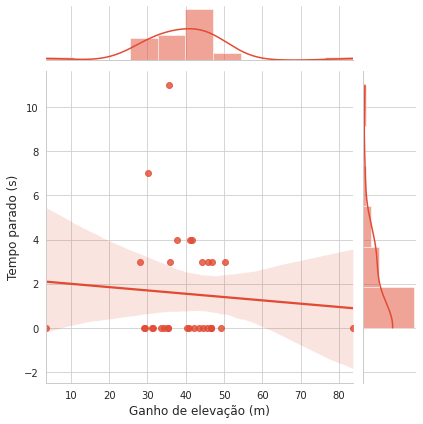

In [52]:
sns.jointplot(x='Ganho de elevação (m)', y='Tempo parado (s)', data=corrida, kind='reg');

- Análise de evento extremo - velocidade máxima:

In [67]:
corrida[corrida['Velocidade máx. (m/s)'] > 5]

,Data da atividade,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Corrida Acum. (km)
145,2020-09-16,1067,3.490,4356104097.gpx.gz,1067,"3,497.800",5.500,42.200,912.000,947.400,24.300,-0.146,21,3.278,0,38.710


- Análise de evento extremo - inclinação máxima:

In [60]:
corrida[corrida['Inclinação máxima (graus)']>40]

,Data da atividade,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Corrida Acum. (km)
146,2020-09-21,1036,3.490,4381020779.gpx.gz,1036,"3,498.500",4.700,49.300,902.500,933.400,47.400,0.286,21,3.377,0,42.200


- Análise de evento extremo - tempo parado:

In [53]:
corrida[corrida['Tempo parado (s)']>10]

,Data da atividade,Tempo decorrido (s),Distância (km),Arquivo gpx,Tempo de movimentação (s),Distância (m),Velocidade máx. (m/s),Ganho de elevação (m),Elevação mínima (m),Elevação máxima (m),Inclinação máxima (graus),Inclinação média (graus),Hora da atividade,Velocidade média (m/s),Tempo parado (s),Distância Corrida Acum. (km)
61,2019-02-09,1104,3.550,2134175090.gpx,1093,"3,558.700",3.900,35.580,913.100,949.000,11.100,0.008,12,3.256,11,3.550


Acima são apresentados alguns eventos extremos. Observa-se que, de maneira geral, eles possuem características similares, como comentado anteriormente nas análises univariadas. Portanto, visando entendê-los melhor, as animações a seguir foram realizadas:

# Animações

Referência: [[1]](https://www.geodose.com/2018/04/create-gpx-tracking-file-visualizer-python.html)

- Importar função `parse_gpx` criada para analisar os arquivos gpx:

In [7]:
from parse_gpx import parse_gpx

## Corrida 1

- Analisar a corrida com a segunda maior distância presente no dataset:

PS: a corrida com a maior distância foi feita em uma pista circular, sem variação de elevação e com entendimento de posicionamento geográfico mais difícil.

In [32]:
corrida[corrida['Distância (km)'] > 3.6][['Distância (km)','Arquivo gpx']]

,Distância (km),Arquivo gpx
105,3.750,2851051986.gpx.gz
107,4.470,2879401674.gpx.gz


- Abrir documento gpx:

In [33]:
file_corrida = open('activities/2851051986.gpx')
xmldoc_corrida = minidom.parse(file_corrida)
track_corrida = xmldoc_corrida.getElementsByTagName('trkpt')
elevation_corrida = xmldoc_corrida.getElementsByTagName('ele')
dtime_corrida = xmldoc_corrida.getElementsByTagName('time')
n_track_corrida = len(track_corrida)

- Analisar o documento utilizando a função `parse_gpx`:

In [36]:
lon_corrida = []
lat_corrida = []
elev_corrida = []
time_corrida = []

parse_gpx(track_corrida, elevation_corrida, dtime_corrida, n_track_corrida, 
          lon_corrida, lat_corrida, elev_corrida, time_corrida)

- Criar função `geo2cart`para converter coordenadas geodésicas para cartesianas, função `distance` para calcular a distância Euclidiana, e função `velocity` para calcular a velocidade em função da distância e tempo:

In [8]:
def geo2cart(lon,lat,elev):
    a = 6378137 # WGS-84 ellipsoid major axis
    b = 6356752.3142 # WGS-84 minor axis
    e2 = 1-(b**2/a**2)
    N = float(a/math.sqrt(1-e2*(math.sin(math.radians(abs(lat)))**2)))
    X = (N+elev)*math.cos(math.radians(lat))*math.cos(math.radians(lon))
    Y = (N+elev)*math.cos(math.radians(lat))*math.sin(math.radians(lon))
    return X,Y

def distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def velocity(x0,y0,x1,y1,t0,t1):
    try:
        delta_x = distance(x0,y0,x1,y1)
        delta_t = t1-t0
        return float(delta_x/delta_t)
    except:
        return 0

- Calcular variáveis coordenadas cartesianas, distância acumulada, e velocidade:

In [38]:
dist_corrida_list = [0.]
vel_corrida_list = [0.]
l=0
for k in range(n_track_corrida-1):
    if k<(n_track_corrida-1):
        l+=1
    else:
        l=k
    
    # coordenadas cartesianas
    XY0_c = geo2cart(lon_corrida[k], lat_corrida[k], elev_corrida[k])
    XY1_c = geo2cart(lon_corrida[l], lat_corrida[l], elev_corrida[l])
    
    # distância
    dx_c = distance(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1])
    sum_dx_c = dx_c + dist_corrida_list[-1]
    dist_corrida_list.append(sum_dx_c)
    
    # velocidade
    vel_c = velocity(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1], time_corrida[k], time_corrida[l])
    vel_corrida_list.append(vel_c)

- Plotar animações:

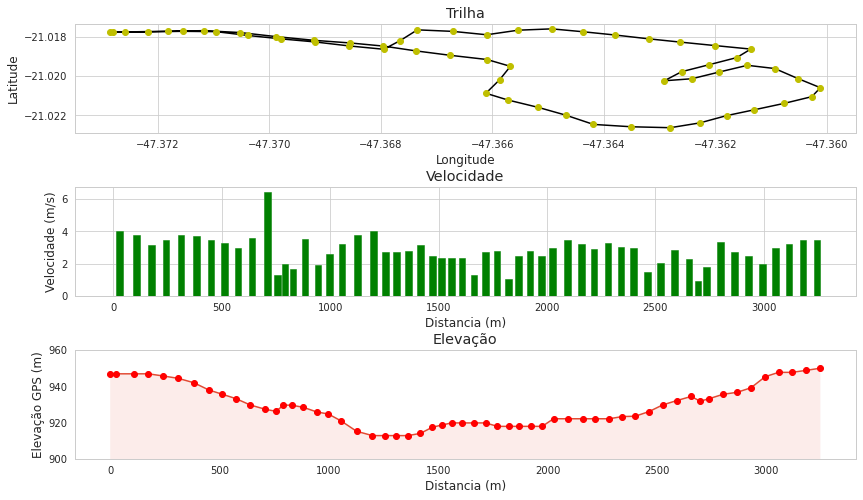

In [39]:
# Trilha
f,(trilha_c,velocidade_c,elevacao_c)=plt.subplots(3,1,figsize=(14,8))
plt.subplots_adjust(hspace=0.5)
trilha_c.plot(lon_corrida[::10],lat_corrida[::10],'k')
trilha_c.set_ylabel("Latitude")
trilha_c.set_xlabel("Longitude")
trilha_c.set_title("Trilha")

# Velocidade
velocidade_c.bar(dist_corrida_list[::10],vel_corrida_list[::10],30,color='w',edgecolor='w')
velocidade_c.set_title("Velocidade")
velocidade_c.set_xlabel("Distancia (m)")
velocidade_c.set_ylabel("Velocidade (m/s)")

# Elevação
base_reg=0
elevacao_c.plot(dist_corrida_list[::10],elev_corrida[::10])
elevacao_c.fill_between(dist_corrida_list[::10],elev_corrida[::10],base_reg,alpha=0.1)
elevacao_c.set_ylim(900,960)
elevacao_c.set_title("Elevação")
elevacao_c.set_xlabel("Distancia (m)")
elevacao_c.set_ylabel("Elevação GPS (m)")
elevacao_c.grid()

# Animação
for i in range(0,n_track_corrida,10):
    trilha_c.plot(lon_corrida[i],lat_corrida[i],'yo')
    velocidade_c.bar(dist_corrida_list[i],vel_corrida_list[i],30,color='g',edgecolor='g')
    elevacao_c.plot(dist_corrida_list[i],elev_corrida[i],'ro')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.0001)
    
plt.show()

O gráfico de elevação aponta que a corrida pode ser segmentada em primeiramente descida até uma distância aproximada de 1.5 km, e após somente subida, com ganho de elevação.\
Nota-se que, em aproximadamente 750 m de distância, ocorreu um pico de velocidade, alcançando mais de 6 m/s.
Já avaliando os mínimos de velocidade, nota-se que tais valores, pela corrida ter ocorrido na rua, podem ser explicados por paradas em travessia da rua com passagem de carros, pois tais valores se encontram entre valores aproximadamente constantes de velocidade e elevação.\
Novamente nota-se a importância de analisar ao longo das atividades e não somente como estatísticas gerais, pois conclusões precipitadas como, nesse caso, redução de velocidade devido a uma subida muito íngreme, podem ser feitas.

## Corrida 2 - Evento Extremo

- Analisar evento extremo - maior tempo parado:

In [55]:
corrida[corrida['Tempo parado (s)']>10]['Arquivo gpx']

61    2134175090.gpx
Name: Arquivo gpx, dtype: object

- Abrir arquivo:

In [9]:
file_corrida = open('activities/2134175090.gpx')
xmldoc_corrida = minidom.parse(file_corrida)
track_corrida = xmldoc_corrida.getElementsByTagName('trkpt')
elevation_corrida = xmldoc_corrida.getElementsByTagName('ele')
dtime_corrida = xmldoc_corrida.getElementsByTagName('time')
n_track_corrida = len(track_corrida)

- Aplicar função `parse_gpx`:

In [10]:
lon_corrida = []
lat_corrida = []
elev_corrida = []
time_corrida = []

parse_gpx(track_corrida, elevation_corrida, dtime_corrida, n_track_corrida, 
          lon_corrida, lat_corrida, elev_corrida, time_corrida)

- Criar variáveis coordenadas cartesianas, distância acumulada, e velocidade:

In [11]:
dist_corrida_list = [0.]
vel_corrida_list = [0.]
l=0
for k in range(n_track_corrida-1):
    if k<(n_track_corrida-1):
        l+=1
    else:
        l=k
    
    # coordenadas cartesianas
    XY0_c = geo2cart(lon_corrida[k], lat_corrida[k], elev_corrida[k])
    XY1_c = geo2cart(lon_corrida[l], lat_corrida[l], elev_corrida[l])
    
    # distância
    dx_c = distance(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1])
    sum_dx_c = dx_c + dist_corrida_list[-1]
    dist_corrida_list.append(sum_dx_c)
    
    # velocidade
    vel_c = velocity(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1], time_corrida[k], time_corrida[l])
    vel_corrida_list.append(vel_c)

- Plotar animações:

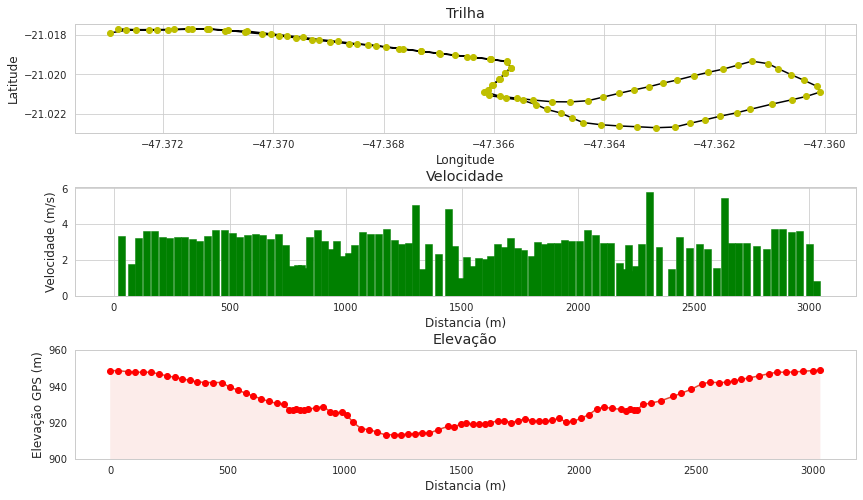

In [59]:
# Trilha
f,(trilha_c,velocidade_c,elevacao_c)=plt.subplots(3,1,figsize=(14,8))
plt.subplots_adjust(hspace=0.5)
trilha_c.plot(lon_corrida[::10],lat_corrida[::10],'k')
trilha_c.set_ylabel("Latitude")
trilha_c.set_xlabel("Longitude")
trilha_c.set_title("Trilha")

# Velocidade
velocidade_c.bar(dist_corrida_list[::10],vel_corrida_list[::10],30,color='w',edgecolor='w')
velocidade_c.set_title("Velocidade")
velocidade_c.set_xlabel("Distancia (m)")
velocidade_c.set_ylabel("Velocidade (m/s)")

# Elevação
base_reg=0
elevacao_c.plot(dist_corrida_list[::10],elev_corrida[::10])
elevacao_c.fill_between(dist_corrida_list[::10],elev_corrida[::10],base_reg,alpha=0.1)
elevacao_c.set_ylim(900,960)
elevacao_c.set_title("Elevação")
elevacao_c.set_xlabel("Distancia (m)")
elevacao_c.set_ylabel("Elevação GPS (m)")
elevacao_c.grid()

# Animação
for i in range(0,n_track_corrida,10):
    trilha_c.plot(lon_corrida[i],lat_corrida[i],'yo')
    velocidade_c.bar(dist_corrida_list[i],vel_corrida_list[i],30,color='g',edgecolor='g')
    elevacao_c.plot(dist_corrida_list[i],elev_corrida[i],'ro')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.0001)
    
plt.show()

Nota-se, nessa atividade, que o pico de velocidade de aproximadamente 6 m/s ocorreu, diferentemente da corrida apresentada anteriormente, ocorreu durante a subida e, aparentemente, em uma parte com subida íngreme.\
Entretanto, tratando-se do evento extremo, nota-se uma certa dificuldade em conseguir compreender onde ocorreram a(s) parada(s). Portanto, um novo gráfico com velocidade em função do tempo foi realizado:

- Cria lista com hora da corrida:

In [13]:
time_plot = []

for s in range(n_track_corrida):
        dt = dtime_corrida[s].firstChild.nodeValue
        time_split = dt.split('T')
        hms_split = time_split[1].split(':')
        time_hour = hms_split[0]
        time_min = hms_split[1]
        time_sec = hms_split[2].split('Z')[0]
        time_final = time_hour+':'+time_min+':'+time_sec
        time_plot.append(time_final)

- Criação de dataframe para transformação de lista em datetime:

In [15]:
time_df = pd.DataFrame(data={'Hora':time_plot,
                            'Velocidade':vel_corrida_list})
time_df['Hora'] = pd.to_datetime(time_df['Hora'], format='%H:%M:%S')
time_df.head()

,Hora,Velocidade
0,1900-01-01 12:21:21,0.000
1,1900-01-01 12:21:21,0.000
2,1900-01-01 12:21:22,3.746
3,1900-01-01 12:21:33,0.435
4,1900-01-01 12:21:35,1.716


- Plotar gráfico:

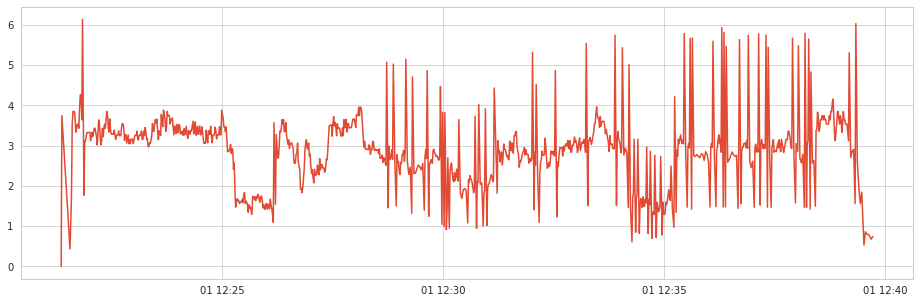

In [16]:
plt.figure(figsize=(16,5))
plt.plot(time_df['Hora'], time_df['Velocidade']);

Nota-se, pelo gráfico acima, que a velocidade se reduziu a zero apenas no início da atividade, e que, portanto, não se somam mais que 10 s de atividade parada.\
Portanto, não existe uma explicação concreta, mas, possivelmente existe alguma incompatibilidade ou erro durante o upload dos dados gravados pelo relógio (Amazfit Verge) utilizado na corrida, e o Strava.

## Corrida 3 - Evento Extremo

- Analisar evento extremo - inclinação máxima:

In [61]:
corrida[corrida['Inclinação máxima (graus)']>40]['Arquivo gpx']

146    4381020779.gpx.gz
Name: Arquivo gpx, dtype: object

- Abrir arquivo:

In [17]:
file_corrida = open('activities/4381020779.gpx')
xmldoc_corrida = minidom.parse(file_corrida)
track_corrida = xmldoc_corrida.getElementsByTagName('trkpt')
elevation_corrida = xmldoc_corrida.getElementsByTagName('ele')
dtime_corrida = xmldoc_corrida.getElementsByTagName('time')
n_track_corrida = len(track_corrida)

- Aplicação da função `parse_gpx`:

In [18]:
lon_corrida = []
lat_corrida = []
elev_corrida = []
time_corrida = []

parse_gpx(track_corrida, elevation_corrida, dtime_corrida, n_track_corrida, 
          lon_corrida, lat_corrida, elev_corrida, time_corrida)

- Criação das variáveis coordenadas geográficas, distância acumulada, e velocidade:

In [19]:
dist_corrida_list = [0.]
vel_corrida_list = [0.]
l=0
for k in range(n_track_corrida-1):
    if k<(n_track_corrida-1):
        l+=1
    else:
        l=k
    
    # coordenadas cartesianas
    XY0_c = geo2cart(lon_corrida[k], lat_corrida[k], elev_corrida[k])
    XY1_c = geo2cart(lon_corrida[l], lat_corrida[l], elev_corrida[l])
    
    # distância
    dx_c = distance(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1])
    sum_dx_c = dx_c + dist_corrida_list[-1]
    dist_corrida_list.append(sum_dx_c)
    
    # velocidade
    vel_c = velocity(XY0_c[0], XY0_c[1], XY1_c[0], XY1_c[1], time_corrida[k], time_corrida[l])
    vel_corrida_list.append(vel_c)

- Plotar animações:

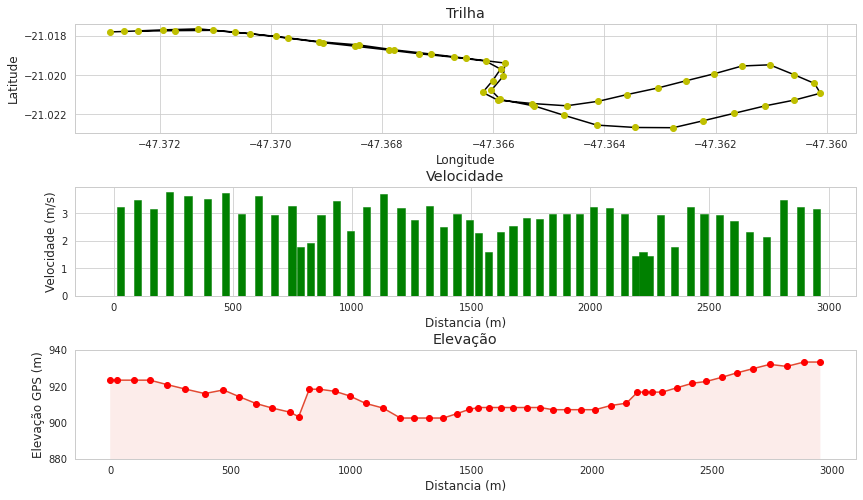

In [20]:
# Trilha
f,(trilha_c,velocidade_c,elevacao_c)=plt.subplots(3,1,figsize=(14,8))
plt.subplots_adjust(hspace=0.5)
trilha_c.plot(lon_corrida[::10],lat_corrida[::10],'k')
trilha_c.set_ylabel("Latitude")
trilha_c.set_xlabel("Longitude")
trilha_c.set_title("Trilha")

# Velocidade
velocidade_c.bar(dist_corrida_list[::10],vel_corrida_list[::10],30,color='w',edgecolor='w')
velocidade_c.set_title("Velocidade")
velocidade_c.set_xlabel("Distancia (m)")
velocidade_c.set_ylabel("Velocidade (m/s)")

# Elevação
base_reg=0
elevacao_c.plot(dist_corrida_list[::10],elev_corrida[::10])
elevacao_c.fill_between(dist_corrida_list[::10],elev_corrida[::10],base_reg,alpha=0.1)
elevacao_c.set_ylim(880,940)
elevacao_c.set_title("Elevação")
elevacao_c.set_xlabel("Distancia (m)")
elevacao_c.set_ylabel("Elevação GPS (m)")
elevacao_c.grid()

# Animação
for i in range(0,n_track_corrida,10):
    trilha_c.plot(lon_corrida[i],lat_corrida[i],'yo')
    velocidade_c.bar(dist_corrida_list[i],vel_corrida_list[i],30,color='g',edgecolor='g')
    elevacao_c.plot(dist_corrida_list[i],elev_corrida[i],'ro')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.0001)
    
plt.show()

Tratando-se do evento extremo - inclinação máxima, nota-se que ela ocorreu em uma subida abrupta próximo a 1 km, onde o ganho de elevação foi de aproximadamente 20 metros em um curto espaço. Nota-se, também, que durante tal parte do trajeto, a velocidade reduziu em aproximadamente 1 m/s.\
Interessante observar também que, diferente do que se pode imaginar, a velocidade não foi mínima durante o trajeto com maior ganho de elevação, mas sim durante uma elevação praticamente constante ocorrida entre 2 - 2.5 km, atingindo aproximadamente 1.5 m/s.